## Gradient descent kostenfunctiew

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Text(0.5, 1.0, 'Data')

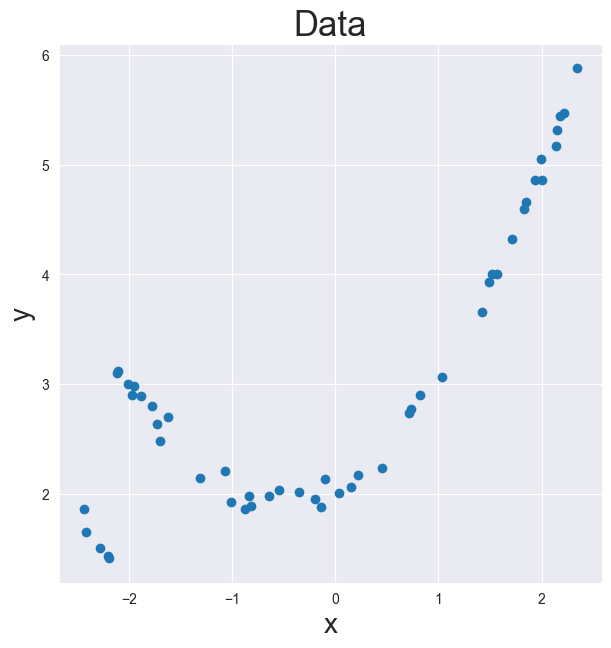

In [2]:
numvals = 50
true_w = 0.5

xvals = np.sort(5*(np.random.random(numvals) - 0.5))
yvals = true_w*(xvals + xvals**2) + np.random.normal(0, 0.1, numvals)
yvals[int(numvals*0.1):] += 2

plt.figure(figsize=(7,7))
plt.scatter(xvals, yvals)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('Data', fontsize=25)

## Model
ŷ = w (x + x^2)

## Loss Function
L(y,ŷ) = ∑^n^ i=1 (ŷi - yi)^2^
L(y,x,w) = ∑^n^ i=1 (w*xi + w'*xi^2^ - yi)^2^
dL/dW = ∑^n^ i=1 2(xi + xi^2^)(w'*xi + w'*xi^2^ - yi)

In [3]:
def get_loss(w, xvals, yvals):
    return np.sum((w*xvals + w*xvals**2 - yvals)**2)

In [4]:
def get_gradient(w, xvals, yvals):
    grad = np.sum(2*(xvals + xvals**2)*(w*xvals + w*xvals**2 - yvals))
    return grad

Text(0.5, 1.0, 'Loss Function')

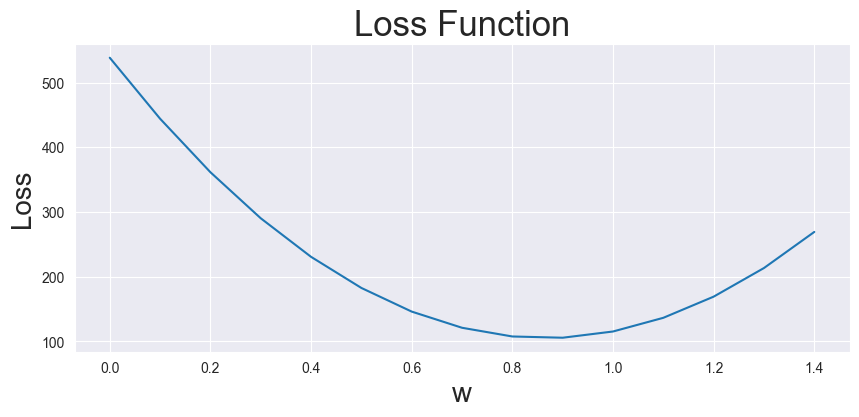

In [5]:
wvals = np.arange(0,1.5,0.1)
lossvals = [get_loss(w,xvals,yvals) for w in wvals]

plt.figure(figsize=(10,4))
plt.plot(wvals, lossvals)
plt.xlabel('w', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('Loss Function', fontsize=25)

Text(0.5, 1.0, 'Gradient')

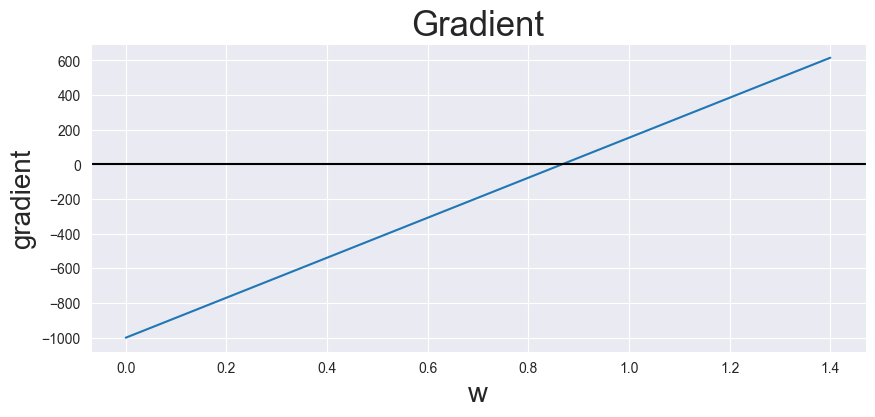

In [6]:
wvals = np.arange(0,1.5,0.1)
gradvals = [get_gradient(w,xvals,yvals) for w in wvals]

plt.figure(figsize=(10,4))
plt.plot(wvals, gradvals)
plt.axhline(0, color='k')
plt.xlabel('w', fontsize=20)
plt.ylabel('gradient', fontsize=20)
plt.title('Gradient', fontsize=25)

In [7]:
def perform_gradient_descent(init_w, eta, num_iters, get_gradient):
    #initial value of w
    w_vals = [init_w]

    #for a fixed number of iterations
    for _ in range(num_iters):
        #get get gradient
        grad = get_gradient(w_vals[-1], xvals, yvals)

        #travel in the direction of the gradient
        w_vals.append(w_vals[-1] - eta*grad)
    return w_vals

Text(0.5, 1.0, 'Gradient Descent Progress\nFinal w: 0.86')

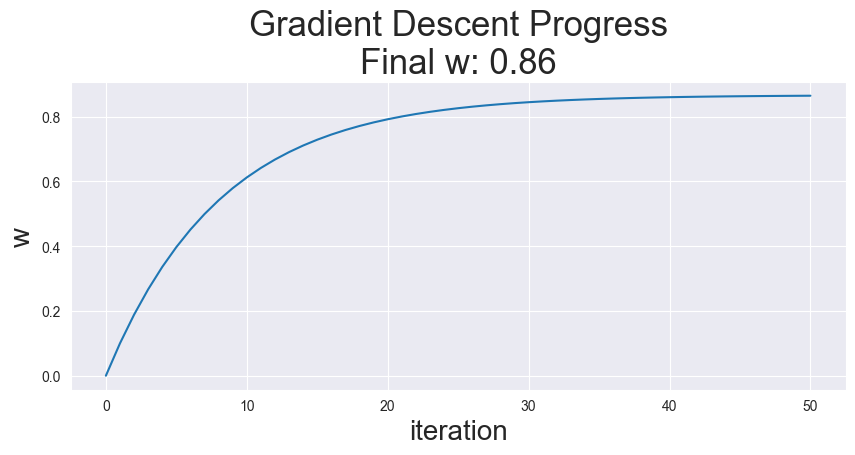

In [8]:

w_vals = perform_gradient_descent(0, 0.0001, 50, get_gradient)

plt.figure(figsize=(10,4))
plt.plot(w_vals)
plt.xlabel('iteration', fontsize=20)
plt.ylabel('w', fontsize=20)
plt.title('Gradient Descent Progress\nFinal w: %s'%round(w_vals[-1],2), fontsize=25)

Text(0.5, 1.0, 'Fitted Model')

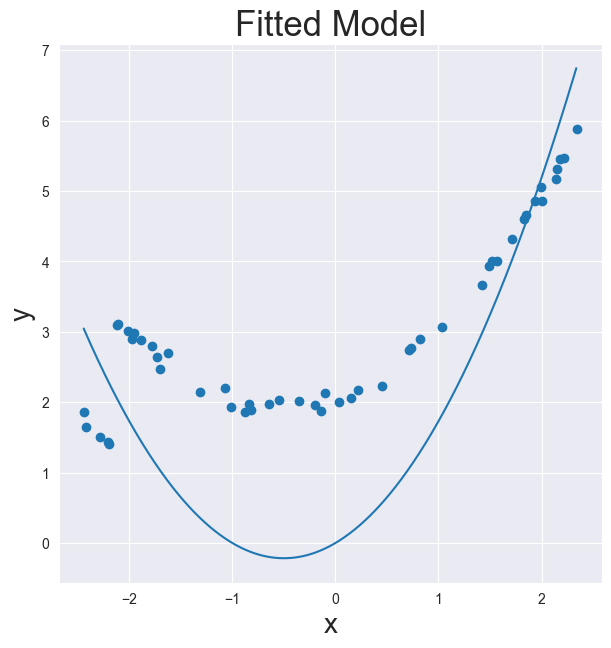

In [9]:

xrange = np.arange(xvals.min(), xvals.max(), 0.01)
pred_yvals_loss1 = w_vals[-1]*(xrange + xrange**2)

plt.figure(figsize=(7,7))
plt.scatter(xvals, yvals)
plt.plot(xrange, pred_yvals_loss1)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('Fitted Model', fontsize=25)

## Custom Loss Function

L(y,ŷ) =  ∑^n^ i=1 e^-1^ (ŷi - yi)^2^
L(y,x,w) = ∑^n^ i=1 e^-1^ (w*xi + w'*xi^2^ - yi)^2^
dL/dW = ∑^n^ i=1 2e^-i^(xi + xi^2^)(w'*xi + w'*xi^2^ - yi)


In [10]:
def get_loss(w, xvals, yvals):
    ivals = np.arange(1,len(xvals)+1)
    return np.sum(np.exp(-ivals)*(w*xvals + w*xvals**2 - yvals)**2)

In [11]:
def get_gradient(w, xvals, yvals):
    ivals = np.arange(1,len(xvals)+1
                      )
    grad = np.sum(2*np.exp(-ivals)*(xvals + xvals**2)*(w*xvals + w*xvals**2 - yvals))
    return grad

Text(0.5, 1.0, 'Loss Function')

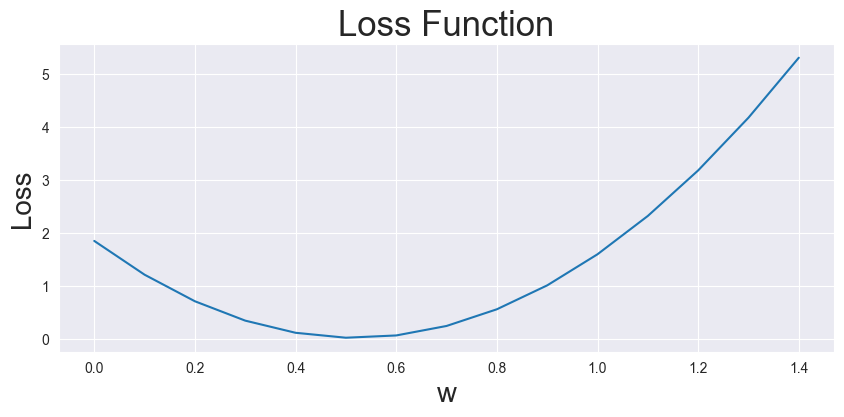

In [12]:
wvals = np.arange(0,1.5,0.1)
lossvals = [get_loss(w,xvals,yvals) for w in wvals]

plt.figure(figsize=(10,4))
plt.plot(wvals, lossvals)
plt.xlabel('w', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('Loss Function', fontsize=25)

Text(0.5, 1.0, 'Gradient')

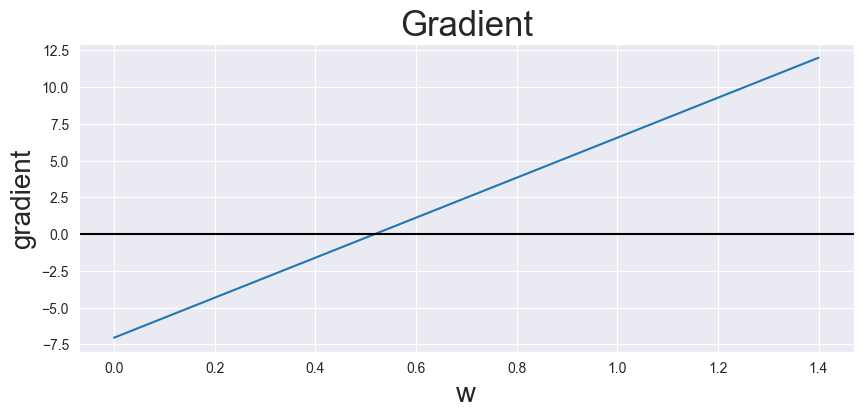

In [13]:
wvals = np.arange(0,1.5,0.1)
gradvals = [get_gradient(w,xvals,yvals) for w in wvals]

plt.figure(figsize=(10,4))
plt.plot(wvals, gradvals)
plt.axhline(0, color='k')
plt.xlabel('w', fontsize=20)
plt.ylabel('gradient', fontsize=20)
plt.title('Gradient', fontsize=25)

In [14]:
def perform_gradient_descent(init_w, eta, num_iters, get_gradient):
    w_vals = [init_w]
    for _ in range(num_iters):
        grad = get_gradient(w_vals[-1], xvals, yvals)
        w_vals.append(w_vals[-1] - eta*grad)
    return w_vals

Text(0.5, 1.0, 'Gradient Descent Progress\nFinal w: 0.52')

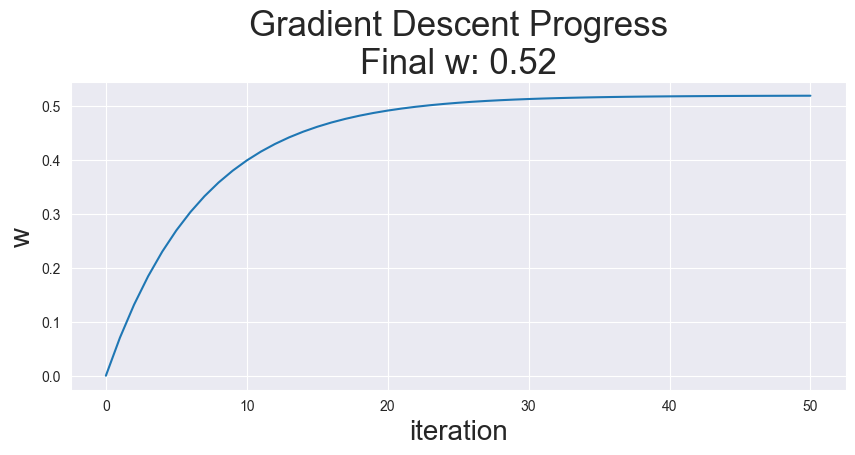

In [15]:
w_vals = perform_gradient_descent(0, 0.01, 50, get_gradient)

plt.figure(figsize=(10,4))
plt.plot(w_vals)
plt.xlabel('iteration', fontsize=20)
plt.ylabel('w', fontsize=20)
plt.title('Gradient Descent Progress\nFinal w: %s'%round(w_vals[-1],2), fontsize=25)

Text(0.5, 1.0, 'Fitted Model')

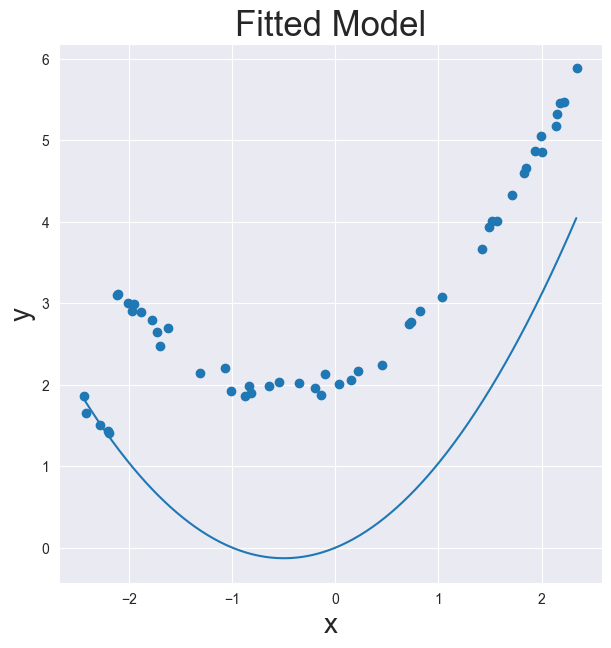

In [16]:

xrange = np.arange(xvals.min(), xvals.max(), 0.01)
pred_yvals_loss2 = w_vals[-1]*(xrange + xrange**2)

plt.figure(figsize=(7,7))
plt.scatter(xvals, yvals)
plt.plot(xrange, pred_yvals_loss2)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('Fitted Model', fontsize=25)

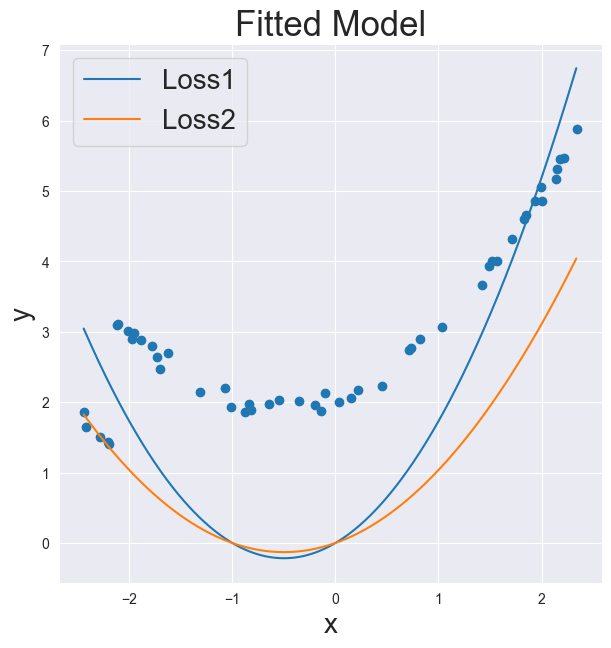

In [17]:
plt.figure(figsize=(7,7))
plt.scatter(xvals, yvals)
p1, = plt.plot(xrange, pred_yvals_loss1)
p2, = plt.plot(xrange, pred_yvals_loss2)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('Fitted Model', fontsize=25)
plt.legend((p1,p2), ['Loss1', 'Loss2'], fontsize=20)